# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [189]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [190]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [191]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | zhigansk
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | toftir
City not found. Skipping...
Processing Record 9 of Set 1 | prince rupert
Processing Record 10 of Set 1 | avdiyivka
Processing Record 11 of Set 1 | joao camara
Processing Record 12 of Set 1 | koygorodok
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | narsaq
Proces

In [192]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [193]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,11.65,82,0,4.55,AU,1679859247
1,lompoc,34.6391,-120.4579,17.79,60,0,6.69,US,1679859248
2,zhigansk,66.7697,123.3711,-8.54,94,100,11.50,RU,1679859248
3,tasiilaq,65.6145,-37.6368,-10.91,81,19,1.51,GL,1679859248
4,lagoa,39.0500,-27.9833,13.87,86,100,11.74,PT,1679859249


In [194]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [195]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,11.65,82,0,4.55,AU,1679859247
1,lompoc,34.6391,-120.4579,17.79,60,0,6.69,US,1679859248
2,zhigansk,66.7697,123.3711,-8.54,94,100,11.50,RU,1679859248
3,tasiilaq,65.6145,-37.6368,-10.91,81,19,1.51,GL,1679859248
4,lagoa,39.0500,-27.9833,13.87,86,100,11.74,PT,1679859249


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

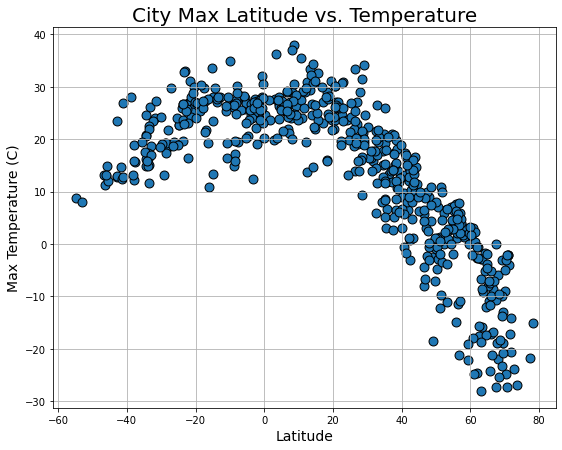

In [196]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature", fontsize=20)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

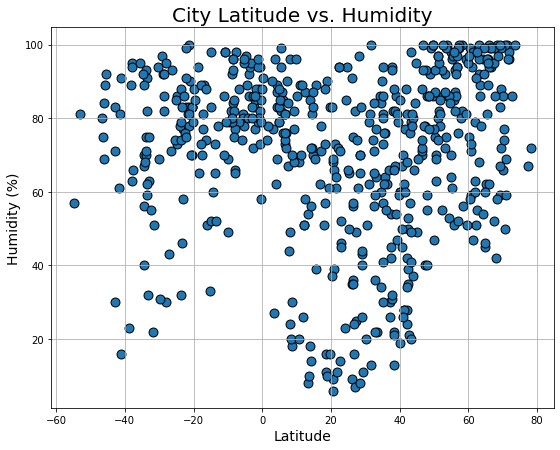

In [197]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

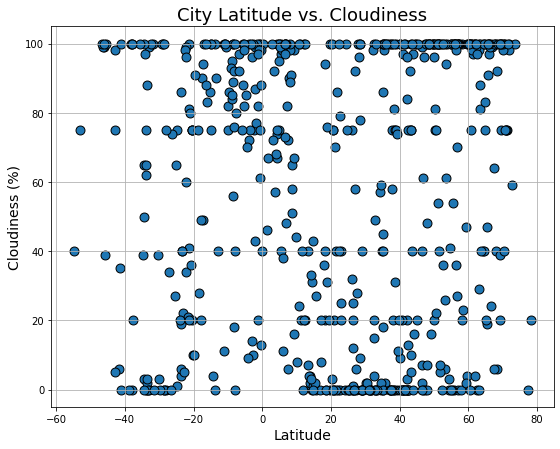

In [198]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

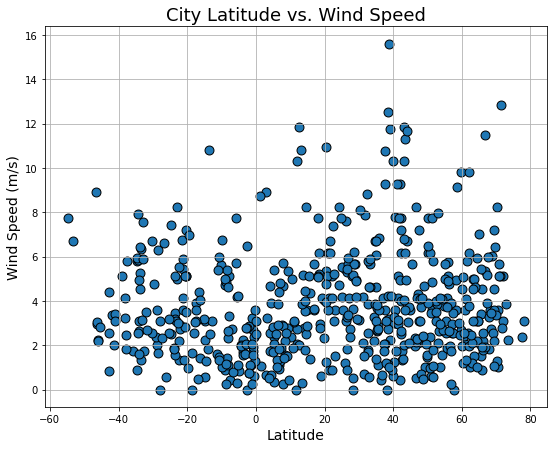

In [199]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=18)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [200]:
# Define a function to create Linear Regression plots
def lin_regress_plot_fn(x_values, y_values):
    # perform a linear regression on y vs. x
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # create plot
    plt.figure(figsize=(9,7))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    return slope, intercept, rvalue, pvalue, stderr

In [201]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lompoc,34.6391,-120.4579,17.79,60,0,6.69,US,1679859248
2,zhigansk,66.7697,123.3711,-8.54,94,100,11.50,RU,1679859248
3,tasiilaq,65.6145,-37.6368,-10.91,81,19,1.51,GL,1679859248
4,lagoa,39.0500,-27.9833,13.87,86,100,11.74,PT,1679859249
6,yellowknife,62.4560,-114.3525,-17.47,55,0,1.03,CA,1679859126


In [202]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,11.65,82,0,4.55,AU,1679859247
5,mataura,-46.1927,168.8643,13.04,69,99,2.94,NZ,1679859249
9,joao camara,-5.5375,-35.8197,25.78,81,88,4.17,BR,1679859250
11,ushuaia,-54.8000,-68.3000,8.81,57,40,7.72,AR,1679859251
14,vaini,-21.2000,-175.2000,25.09,100,100,4.12,TO,1679859252


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7883661842079455


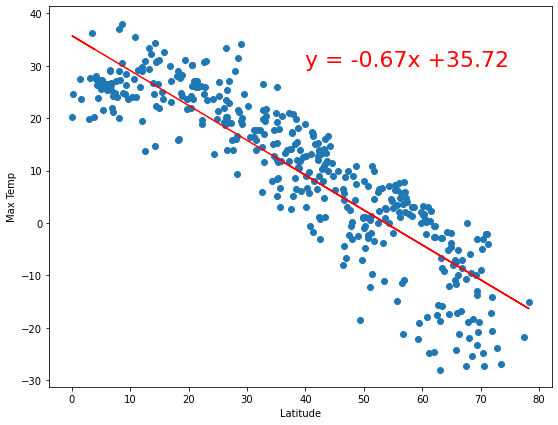

In [225]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(40,30),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.33947439835761106


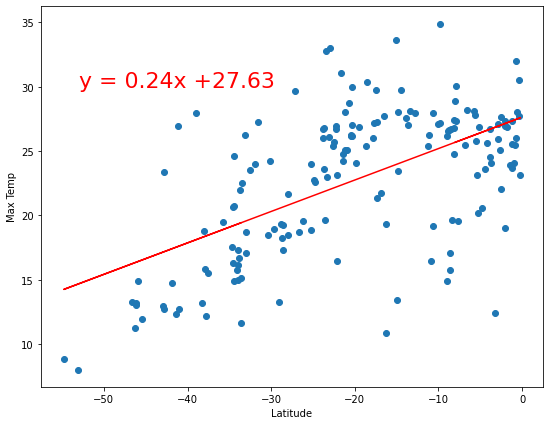

In [229]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-53,30),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The relationship is a weak positive correlation for the southern hemisphere and a strong negative correlation for the northern hemisphere.  This indicates that latitude only strongly correlates to max temperature above the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07854354556012359


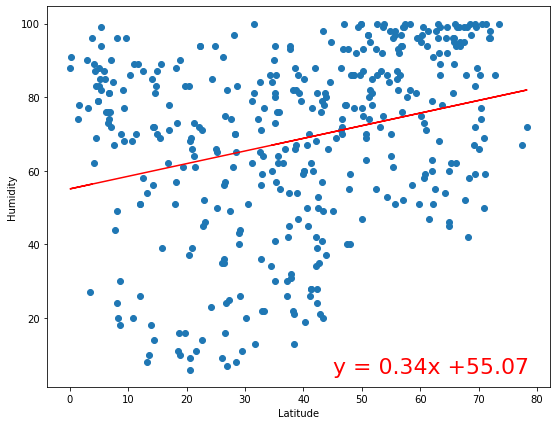

In [232]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,5),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.08041425995304248


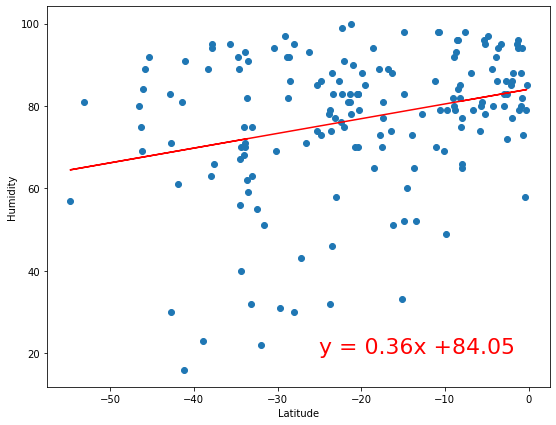

In [236]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a slightly positive, weak correlation between humidity and latitude for both hemispheres.  It's not clear that the correlation has any real statistical meaning.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.034777285962722344


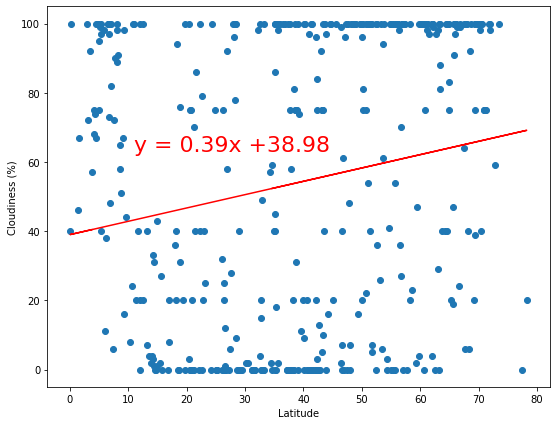

In [241]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(11,63),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.058358933635381874


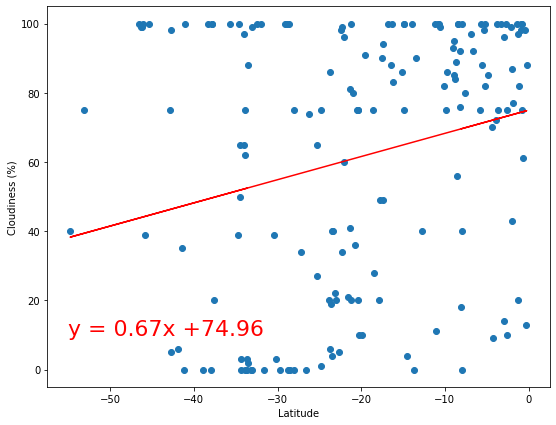

In [243]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,10),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** Similar to the results of latitude and humidity, there is no statistically significant correlation between the data on the x and y axes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0011272056382210514


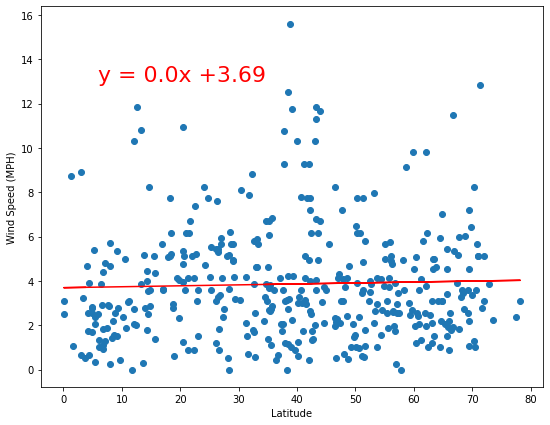

In [248]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.annotate(line_eq,(6,13),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.07923959606871529


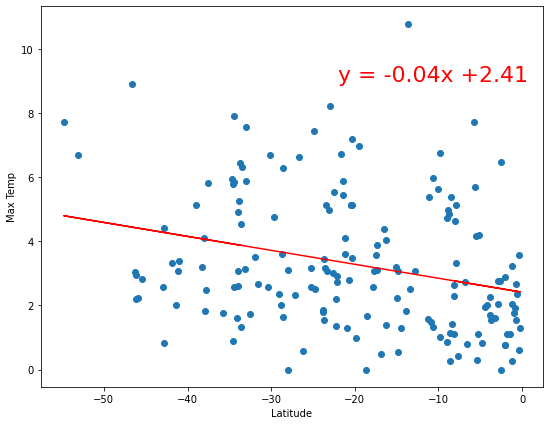

In [253]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-22,9),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is no statistically meaningful correlation between wind speed and latitude.